In [23]:
import pandas as pd

In [24]:
!pwd

/Users/claus/Dev/pycon2015-kaggle-tutorial-master/1


In [25]:
train = pd.read_csv("../train.csv")

In [26]:
train.head()

,Unnamed: 0,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,0,6046168,05/18/2011 14:14:05,543315,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,NaN,NaN,NaN,NaN,1
1,1,4873911,02/02/2011 11:30:10,465076,10/03/2010 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,jaxp,NaN,NaN,NaN,1
2,2,3311559,07/22/2010 17:21:54,406143,07/22/2010 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,sql-server,database-design,enums,NaN,NaN,NaN,1
3,3,9990413,04/03/2012 09:18:39,851755,07/19/2011 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,vb.net,NaN,NaN,NaN,04/15/2012 21:12:48,0
4,4,10421966,05/02/2012 21:25:01,603588,02/04/2011 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,spring-data,NaN,NaN,NaN,NaN,1


In [27]:
train.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
PostId,6046168,4873911,3311559,9990413,10421966
PostCreationDate,05/18/2011 14:14:05,02/02/2011 11:30:10,07/22/2010 17:21:54,04/03/2012 09:18:39,05/02/2012 21:25:01
OwnerUserId,543315,465076,406143,851755,603588
OwnerCreationDate,09/17/2010 10:15:06,10/03/2010 09:30:58,07/22/2010 16:58:20,07/19/2011 10:22:40,02/04/2011 18:05:34
ReputationAtPostCreation,1,192,1,4,334
OwnerUndeletedAnswerCountAtPostTime,2,24,0,1,14
Title,For Mongodb is it better to reference an objec...,How to insert schemalocation in a xml document...,Too many lookup tables,What is this PHP code in VB.net,Spring-Data mongodb querying multiple classes ...
BodyMarkdown,I am building a corpus of indexed sentences in...,i create a xml document with JAXP and search a...,What are the adverse effects of having too man...,I am looking for the vb.net equivalent of this...,"With Spring-Data, you can use the @Document an..."
Tag1,mongodb,dom,sql-server,php,mongodb


In [28]:
train["TitleLength"] = train.Title.apply(len)

(array([  3.56830000e+04,   6.57940000e+04,   2.93650000e+04,
          7.46000000e+03,   1.57700000e+03,   3.82000000e+02,
          5.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          3.00000000e+00]),
 array([  10.,   34.,   58.,   82.,  106.,  130.,  154.,  178.,  202.,
         226.,  250.]),
 <a list of 10 Patch objects>)

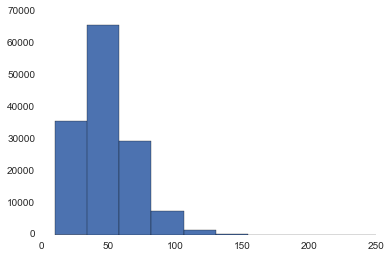

In [29]:
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
%matplotlib inline

plt.hist(train.TitleLength.values)

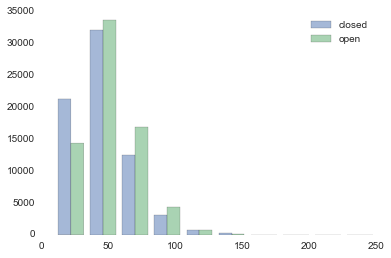

In [30]:
plt.hist([train[train.OpenStatus==0].TitleLength.values, 
          train[train.OpenStatus==1].TitleLength.values],
         label = ["closed", "open"],
         alpha=.5);
plt.legend()

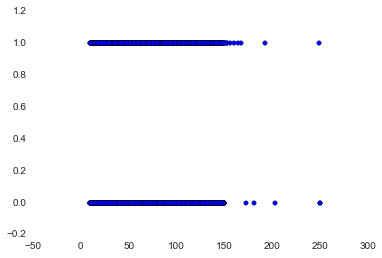

In [31]:
plt.scatter(train.TitleLength, train.OpenStatus)

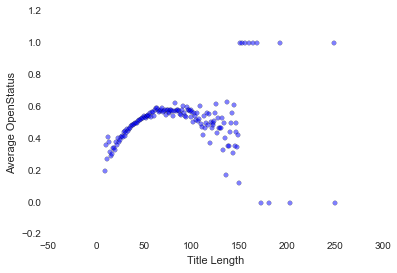

In [32]:
mean_status_by_length = train.groupby("TitleLength").OpenStatus.mean()
mean_status_by_length_df = pd.DataFrame(mean_status_by_length).reset_index()

# add random errors with a normal distribution                      
length_status_scatter = plt.scatter(mean_status_by_length_df.TitleLength, mean_status_by_length_df.OpenStatus, alpha=.5)
length_status_scatter
plt.xlabel("Title Length")
plt.ylabel("Average OpenStatus")

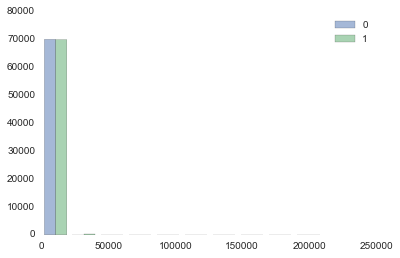

In [33]:
plt.hist([train[train.OpenStatus==0].ReputationAtPostCreation.values, 
          train[train.OpenStatus==1].ReputationAtPostCreation.values],
         label = [0, 1],
         alpha=.5);
plt.legend()

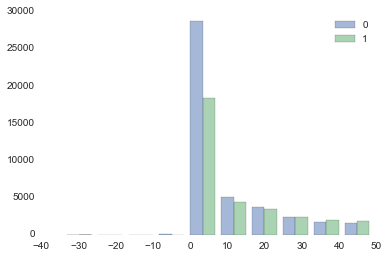

In [34]:
train_low_rep = train[train.ReputationAtPostCreation < 50]
plt.hist([train_low_rep[train_low_rep.OpenStatus==0].ReputationAtPostCreation.values, 
          train_low_rep[train_low_rep.OpenStatus==1].ReputationAtPostCreation.values],
         label = [0, 1],
         alpha=.5);
plt.legend()


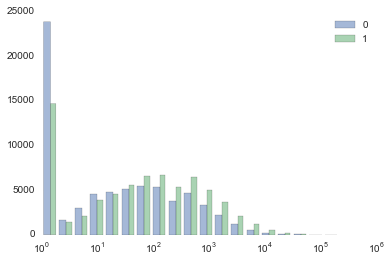

In [35]:
bins = np.logspace(0, np.log10(np.max(train.ReputationAtPostCreation.values)), num=20)
plt.xscale("log")
plt.hist([train[train.OpenStatus==0].ReputationAtPostCreation.values, 
          train[train.OpenStatus==1].ReputationAtPostCreation.values],
         bins = bins,
         label = [0, 1],
         alpha=.5);
plt.legend()


In [36]:
%run 1.py

In [37]:
train = load_feature_matrix("../train.csv")

In [38]:
test = load_feature_matrix("../test.csv")

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


In [40]:
columns = ["ReputationAtPostCreation", "TitleLength"]
lr.fit(X = np.asarray(train[columns]), 
                y = np.asarray(train.OpenStatus).transpose())



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [41]:
lr.predict(np.asarray(train[columns]))
np.mean(lr.predict(np.asarray(train[columns])) == train.OpenStatus)

0.56016168586745752

In [42]:
lr.predict_proba(np.asarray(test[columns]))[:,1]

array([ 0.46135777,  0.48726488,  0.5363571 , ...,  0.47132136,
        0.46700916,  0.42326888])

In [45]:
predictions = lr.predict_proba(np.asarray(test[columns]))[:,1]

In [43]:
!head ../even_odds_sample_submission.csv

"id","OpenStatus"
11768878,0.5
11768880,0.5
11803678,0.5
11803496,0.5
11803700,0.5
11927241,0.5
11927226,0.5
11927247,0.5
11927248,0.5


In [46]:
submission = pd.DataFrame({"id": test.PostId, "OpenStatus": predictions})

In [47]:
!mkdir ../submissions
submission.to_csv("../submissions/first_submission.csv")

In [48]:
!head ../submissions/first_submission.csv

,OpenStatus,id
0,0.4613577747747837,11768878
1,0.4872648805674546,11768880
2,0.5363570995918636,11803678
3,0.4644118437311171,11803496
4,0.467468291831167,11803700
5,0.43016870704979304,11927241
6,0.5951259468828807,11927226
7,0.46352233513119007,11927247
8,0.4597306101962356,11927248


In [49]:
submission.to_csv("../submissions/first_submission.csv", index = False)

In [27]:
!head ../submissions/first_submission.csv

OpenStatus,id
0.4613442833831722,11768878
0.4873077969266373,11768880
0.5364522728505838,11803678
0.4643847937420517,11803496
0.46747052797421246,11803700
0.4300963048222807,11927241
0.5952349249022628,11927226
0.46352014137915953,11927247
0.4597117128306622,11927248


# Let's submit 

https://inclass.kaggle.com/c/pycon-2015-tutorial

"Log loss" is based on:

$$\prod_{i=1}^N \text{probability that prediction i is correct}$$

# Homework

- explore more features!
- make your own submission!


